### Set Up

#### Standard library imports

In [1]:
import datetime
import os
import sys

#### Third party imports 

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
from matplotlib import pyplot as plt

#### Local imports

In [3]:
from modules.magenta.rl_tuner import rl_tuner
from modules.magenta.rl_tuner import rl_tuner_ops

#### Autoreload

In [4]:
%load_ext autoreload
%autoreload 2

#### Setting relative directories and file names

In [5]:
# Place to save your model checkpoints and composion
Working_Directory = os.getcwd()
Project_Directory = os.path.abspath(os.path.join(Working_Directory,'..'))
Output_Directory = Project_Directory + "/outputs/"
Model_Directory = Output_Directory + "models/"
Music_Out_Directory = Output_Directory + "midi/"
Checkpoint_Directory = Model_Directory + "ckpt/"

In [6]:
current_time_str = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
try:
    os.mkdir(Checkpoint_Directory + current_time_str[:-7])    
except:
    pass
DRL_ckpt_dir_name = "20211101/" + "rl_tuner/"
DRL_ckpt_name = "model_full_no_chopin-950000"
DRL_ckpt_dir = Checkpoint_Directory + DRL_ckpt_dir_name
DRL_ckpt_file = DRL_ckpt_dir + DRL_ckpt_name

DL_ckpt_dir_name = "20210924/"
DL_ckpt_name = "Long_Train_256"
DL_ckpt_dir = Checkpoint_Directory + DL_ckpt_dir_name
DL_ckpt_file = DL_ckpt_dir + DL_ckpt_name

#### Compare ckpt -files

In [7]:
print_tensors_in_checkpoint_file(file_name = DRL_ckpt_file, tensor_name='', all_tensors=False)

q_network/dense/bias (DT_FLOAT) [3]
q_network/dense/bias/Adadelta (DT_FLOAT) [3]
q_network/dense/bias/Adadelta_1 (DT_FLOAT) [3]
q_network/dense/kernel (DT_FLOAT) [64,3]
q_network/dense/kernel/Adadelta (DT_FLOAT) [64,3]
q_network/dense/kernel/Adadelta_1 (DT_FLOAT) [64,3]
q_network/dense_1/bias (DT_FLOAT) [3]
q_network/dense_1/bias/Adadelta (DT_FLOAT) [3]
q_network/dense_1/bias/Adadelta_1 (DT_FLOAT) [3]
q_network/dense_1/kernel (DT_FLOAT) [67,3]
q_network/dense_1/kernel/Adadelta (DT_FLOAT) [67,3]
q_network/dense_1/kernel/Adadelta_1 (DT_FLOAT) [67,3]
q_network/dense_10/bias (DT_FLOAT) [3]
q_network/dense_10/bias/Adadelta (DT_FLOAT) [3]
q_network/dense_10/bias/Adadelta_1 (DT_FLOAT) [3]
q_network/dense_10/kernel (DT_FLOAT) [67,3]
q_network/dense_10/kernel/Adadelta (DT_FLOAT) [67,3]
q_network/dense_10/kernel/Adadelta_1 (DT_FLOAT) [67,3]
q_network/dense_11/bias (DT_FLOAT) [3]
q_network/dense_11/bias/Adadelta (DT_FLOAT) [3]
q_network/dense_11/bias/Adadelta_1 (DT_FLOAT) [3]
q_network/dense_11/k

In [8]:
print_tensors_in_checkpoint_file(file_name = DL_ckpt_file, tensor_name='', all_tensors=False)

dense/bias (DT_FLOAT) [3]
dense/bias/Adadelta (DT_FLOAT) [3]
dense/bias/Adadelta_1 (DT_FLOAT) [3]
dense/kernel (DT_FLOAT) [64,3]
dense/kernel/Adadelta (DT_FLOAT) [64,3]
dense/kernel/Adadelta_1 (DT_FLOAT) [64,3]
dense_1/bias (DT_FLOAT) [3]
dense_1/bias/Adadelta (DT_FLOAT) [3]
dense_1/bias/Adadelta_1 (DT_FLOAT) [3]
dense_1/kernel (DT_FLOAT) [67,3]
dense_1/kernel/Adadelta (DT_FLOAT) [67,3]
dense_1/kernel/Adadelta_1 (DT_FLOAT) [67,3]
dense_10/bias (DT_FLOAT) [3]
dense_10/bias/Adadelta (DT_FLOAT) [3]
dense_10/bias/Adadelta_1 (DT_FLOAT) [3]
dense_10/kernel (DT_FLOAT) [67,3]
dense_10/kernel/Adadelta (DT_FLOAT) [67,3]
dense_10/kernel/Adadelta_1 (DT_FLOAT) [67,3]
dense_11/bias (DT_FLOAT) [3]
dense_11/bias/Adadelta (DT_FLOAT) [3]
dense_11/bias/Adadelta_1 (DT_FLOAT) [3]
dense_11/kernel (DT_FLOAT) [67,3]
dense_11/kernel/Adadelta (DT_FLOAT) [67,3]
dense_11/kernel/Adadelta_1 (DT_FLOAT) [67,3]
dense_12/bias (DT_FLOAT) [3]
dense_12/bias/Adadelta (DT_FLOAT) [3]
dense_12/bias/Adadelta_1 (DT_FLOAT) [3]
d

### Initialise network

In [9]:
# Model parameter settings
ALGORITHM = 'q'
REWARD_SCALER = 1
OUTPUT_EVERY_NTH = int(5e4)
NUM_NOTES_IN_COMPOSITION = 32
PRIME_WITH_MIDI = False

In [10]:
rl_tuner_hparams = tf.contrib.training.HParams(random_action_probability = 0.1,
                                               store_every_nth = 1,
                                               train_every_nth = 5,
                                               minibatch_size = 32,
                                               discount_rate = 0.5,
                                               max_experience = 10000,
                                               target_network_update_rate = 0.001)

In [11]:
rl_net = rl_tuner.RLTuner(DRL_ckpt_dir,
                          Music_Out_Directory,
                          note_rnn_checkpoint_dir = DL_ckpt_dir,
                          note_rnn_checkpoint_file = DL_ckpt_file,
                          dqn_hparams = rl_tuner_hparams, 
                          algorithm = ALGORITHM,
                          reward_scaler = REWARD_SCALER,
                          output_every_nth = OUTPUT_EVERY_NTH,
                          num_notes_in_melody = NUM_NOTES_IN_COMPOSITION)

INFO:tensorflow:Initializing q network
INFO:tensorflow:Initializing melody RNN graph for scope q_network
INFO:tensorflow:Initializing target q network
INFO:tensorflow:Initializing melody RNN graph for scope target_q_network
INFO:tensorflow:Initializing reward network
INFO:tensorflow:Initializing melody RNN graph for scope reward_rnn
INFO:tensorflow:Adding RL graph variables
INFO:tensorflow:Adding reward computation portion of the graph
INFO:tensorflow:Adding taking action portion of graph
Instructions for updating:
Use the `axis` argument instead
INFO:tensorflow:Add estimating future rewards portion of graph
INFO:tensorflow:Adding q value prediction portion of graph
INFO:tensorflow:Adding target network update portion of graph
INFO:tensorflow:Restoring variables from checkpoint
INFO:tensorflow:Checkpoint dir: /home/mirko/Documents/FHWN/MA/master_thesis/code/tf1/outputs/models/ckpt/20210924/
INFO:tensorflow:Checkpoint file: /home/mirko/Documents/FHWN/MA/master_thesis/code/tf1/outputs/mo

### Generate initial music sequence before training with RL 

INFO:tensorflow:Priming with note 28
INFO:tensorflow:Generated sequence: [28, 28, 28, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 28, 28, 28, 0, 1, 1, 0, 1, 1, 1, 0, 0, 28, 28, 28, 28, 28, 0, 0, 0, 1, 0, 1, 0, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
INFO:tensorflow:Wrote a melody to /home/mirko/Documents/FHWN/MA/master_thesis/code/tf1/outputs/midi/
INFO:tensorflow:Visualizing note selection probabilities:


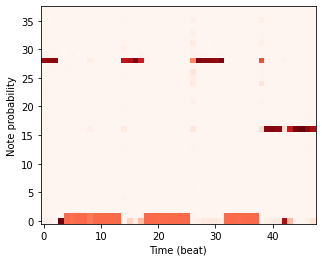

In [12]:
rl_net.generate_music_sequence(visualize_probs=True, title='pre_rl', length=48)

### DRL training

In [13]:
n = int(1e6)
rl_net.train(num_steps=n, exploration_period=n // 2)

INFO:tensorflow:Evaluating model at 20211101-200312...


/home/mirko/Documents/FHWN/MA/master_thesis/code/tf1/notebooks/modules/magenta/rl_tuner/rl_tuner_ops.py:141: RuntimeWarning: invalid value encountered in double_scalars
  return (x[lag:] * x[:n - lag]).sum() / float(n) / c0


INFO:tensorflow:Finished model evaluation at 20211101-200358!
INFO:tensorflow:Evaluating model at 20211101-205450...
INFO:tensorflow:Training iteration 50000
INFO:tensorflow:	Reward for last 50000 steps: -422711.1526027435
INFO:tensorflow:		Music theory reward: -20958.482658889716
INFO:tensorflow:		Note RNN reward: -401752.6699438691
INFO:tensorflow:	Exploration probability is 0.91
INFO:tensorflow:Finished model evaluation at 20211101-205540!
INFO:tensorflow:Evaluating model at 20211101-214604...
INFO:tensorflow:Training iteration 100000
INFO:tensorflow:	Reward for last 50000 steps: -383416.9212314806
INFO:tensorflow:		Music theory reward: -20905.909112609537
INFO:tensorflow:		Note RNN reward: -362511.012118876
INFO:tensorflow:	Exploration probability is 0.8200000000000001
INFO:tensorflow:Finished model evaluation at 20211101-214700!
INFO:tensorflow:Evaluating model at 20211101-223845...
INFO:tensorflow:Training iteration 150000
INFO:tensorflow:	Reward for last 50000 steps: -347651.921

### Analyse Results

In [ ]:
grad = tf.constant([-0.1,1.,0.,0.])
epsilon = tf.constant(0.001)
grad_pos_eps = tf.cast(tf.greater_equal(grad, 0), dtype=grad.dtype) * epsilon
grat_neg_eps = tf.cast(tf.less(grad, 0), dtype=grad.dtype) * (-epsilon)
grad = grad + grad_pos_eps + grat_neg_eps

with tf.Session() as sess:  print(grad.eval()) 

In [ ]:
# Plot the rewards received during training. Improves as chance of random exploration action decreases.
rl_net.plot_rewards()

In [ ]:
# Plot rewards received during calls to evaluation function throughout training. 
# Does not include exploration or random actions.
rl_net.plot_evaluation()

### Generate sequence after training with RL 

INFO:tensorflow:Priming with note 20
INFO:tensorflow:Generated sequence: [20, 20, 20, 0, 1, 21, 21, 21, 21, 0, 1, 1, 0, 0, 33, 33, 33, 33, 0, 0, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 6, 6, 6, 6, 6, 0, 33, 33, 33, 33, 0, 1, 1, 0, 0, 0]
INFO:tensorflow:Wrote a melody to /home/mirko/Documents/FHWN/MA/master_thesis/code/tf1/outputs/midi/
INFO:tensorflow:Visualizing note selection probabilities:


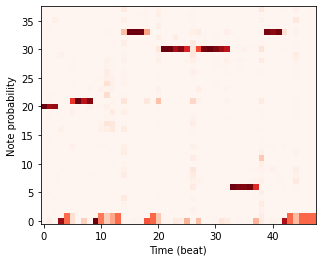

In [16]:
rl_net.generate_music_sequence(visualize_probs=True, title='post_rl', length=48)

### Save Model

In [18]:
# If you're happy with the model, save a version!
rl_net.save_model('model_full_no_chopin', DRL_ckpt_dir)

### Compute music theory statistics

In [17]:
# Compute statistics about how well the model adheres to the music theory rules.
stat_dict = rl_net.evaluate_music_theory_metrics(num_compositions=1000)

INFO:tensorflow:Total compositions: 1000.0
Total notes:32000.0
	Compositions starting with tonic: 28.0
	Compositions with unique highest note:49.0
	Compositions with unique lowest note:38.0
	Number of resolved leaps:285.0
	Number of double leaps:115.0
	Notes not in key:8015.0
	Notes in motif:2335.0
	Notes in repeated motif:0.0
	Notes excessively repeated:6769.0

	Percent compositions starting with tonic:0.028
	Percent compositions with unique highest note:0.049
	Percent compositions with unique lowest note:0.038
	Percent of leaps resolved:0.7125
	Percent notes not in key:0.25046875
	Percent notes in motif:0.07296875
	Percent notes in repeated motif:0.0
	Percent notes excessively repeated:0.21153125

	Average autocorrelation of lag1:0.6341388126378283
	Average autocorrelation of lag2:0.34322670196567967
	Average autocorrelation of lag3:0.14937514775304056

	Avg. num octave jumps per composition:0.832
	Avg. num sevenths per composition:0.039
	Avg. num fifths per composition:0.161
	Avg. n

### Restore from directory

In [59]:
rl_tuner_hparams = tf.contrib.training.HParams(random_action_probability = 0.1,
                                               store_every_nth = 1,
                                               train_every_nth = 5,
                                               minibatch_size = 32,
                                               discount_rate = 0.5,
                                               max_experience = 10000,
                                               target_network_update_rate = 0.01)

In [60]:
x      = rl_tuner.RLTuner(DRL_ckpt_dir,
                          Music_Out_Directory,
                          note_rnn_checkpoint_dir = DL_ckpt_dir,
                          note_rnn_checkpoint_file = DL_ckpt_file,
                          dqn_hparams = rl_tuner_hparams, 
                          algorithm = ALGORITHM,
                          reward_scaler = REWARD_SCALER,
                          output_every_nth = OUTPUT_EVERY_NTH,
                          num_notes_in_melody = NUM_NOTES_IN_COMPOSITION)

INFO:tensorflow:Initializing q network
INFO:tensorflow:Initializing melody RNN graph for scope q_network
INFO:tensorflow:Initializing target q network
INFO:tensorflow:Initializing melody RNN graph for scope target_q_network
INFO:tensorflow:Initializing reward network
INFO:tensorflow:Initializing melody RNN graph for scope reward_rnn
INFO:tensorflow:Adding RL graph variables
INFO:tensorflow:Adding reward computation portion of the graph
INFO:tensorflow:Adding taking action portion of graph
Instructions for updating:
Use the `axis` argument instead
INFO:tensorflow:Add estimating future rewards portion of graph
INFO:tensorflow:Adding q value prediction portion of graph
INFO:tensorflow:Adding target network update portion of graph
INFO:tensorflow:Restoring variables from checkpoint
INFO:tensorflow:Checkpoint dir: /home/mirko/Documents/FHWN/MA/master_thesis/code/tf1/outputs/models/ckpt/20210924/
INFO:tensorflow:Checkpoint file: /home/mirko/Documents/FHWN/MA/master_thesis/code/tf1/outputs/mo

In [61]:
x.evaluate_model()

/home/mirko/Documents/FHWN/MA/master_thesis/code/tf1/notebooks/modules/magenta/rl_tuner/rl_tuner_ops.py:141: RuntimeWarning: invalid value encountered in double_scalars
  return (x[lag:] * x[:n - lag]).sum() / float(n) / c0


In [65]:
x.eval_avg_music_theory_reward

[-43.662034027451085]

In [13]:
x.restore_from_directory(Checkpoint_Directory+DRL_ckpt_dir_name,'model_full_no_chopin-950000', 'model_full_no_chopin-950000.npz')

Attempting to restore from checkpoint /home/mirko/Documents/FHWN/MA/master_thesis/code/tf1/outputs/models/ckpt/20211101/rl_tuner/model_full_no_chopin-950000
INFO:tensorflow:Attempting to restore from checkpoint /home/mirko/Documents/FHWN/MA/master_thesis/code/tf1/outputs/models/ckpt/20211101/rl_tuner/model_full_no_chopin-950000
INFO:tensorflow:Restoring parameters from /home/mirko/Documents/FHWN/MA/master_thesis/code/tf1/outputs/models/ckpt/20211101/rl_tuner/model_full_no_chopin-950000
Attempting to load saved reward values from file /home/mirko/Documents/FHWN/MA/master_thesis/code/tf1/outputs/models/ckpt/20211101/rl_tuner/model_full_no_chopin-950000.npz
INFO:tensorflow:Attempting to load saved reward values from file /home/mirko/Documents/FHWN/MA/master_thesis/code/tf1/outputs/models/ckpt/20211101/rl_tuner/model_full_no_chopin-950000.npz


In [57]:
def plot_evaluation_and_rewards(rltuner, t):

    reward_batch = rltuner.output_every_nth
    x = [reward_batch * i for i in np.arange(len(rltuner.eval_avg_reward))]
    x2 = [reward_batch * i for i in np.arange(len(rltuner.rewards_batched))]    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17, 5), constrained_layout=True)
    
    ax1.plot(x2, rltuner.rewards_batched, color='black')
    ax1.plot(x2, rltuner.music_theory_rewards_batched, color='black', linestyle='dashed')
    ax1.plot(x2, rltuner.note_rnn_rewards_batched, color='black', linestyle='dotted')
    ax1.set_xlabel('Training epoch')
    ax1.set_ylabel('Cumulative reward \nfor last ' + str(reward_batch) + ' steps')

    ax2.plot(x, rltuner.eval_avg_reward, color='black')
    ax2.plot(x, rltuner.eval_avg_music_theory_reward, color='black', linestyle='dashed')
    ax2.plot(x, rltuner.eval_avg_note_rnn_reward, color='black', linestyle='dotted')
    ax2.set_xlabel('Training epoch')
    ax2.set_ylabel('Average reward')
    ax2.legend(['Total', 'Music theory', 'Note RNN'], loc='center right')


    plt.rcParams.update({'font.size': 22})
    plt.savefig(os.path.join(t+'.png'),  facecolor="w", transparent= False, dpi=300, format='png') #, bbox_inches='tight', transparent= False
    return plt

<module 'matplotlib.pyplot' from '/home/mirko/.local/share/virtualenvs/tf1-lyTET9H8/lib/python3.6/site-packages/matplotlib/pyplot.py'>

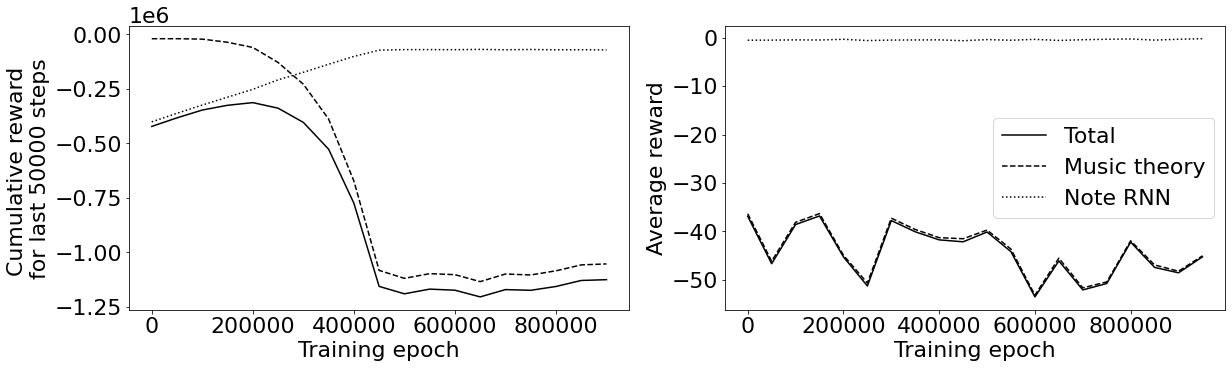

In [58]:
plot_evaluation_and_rewards(x, 'reward_plots')

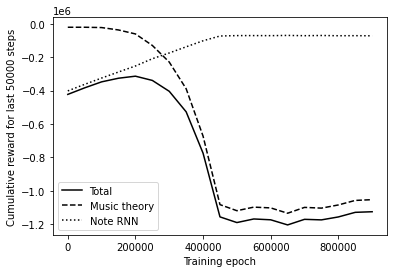

In [25]:
plot_rewards_2(x)

INFO:tensorflow:Priming with note 24
INFO:tensorflow:Generated sequence: [24, 24, 24, 24, 24, 24, 0, 0, 27, 27, 27, 27, 27, 27, 22, 22, 22, 23, 23, 23, 23, 0, 27, 27, 27, 27, 35, 0, 0, 0, 31, 31]
INFO:tensorflow:Wrote a melody to /home/mirko/Documents/FHWN/MA/master_thesis/code/tf1/outputs/midi/
INFO:tensorflow:Visualizing note selection probabilities:


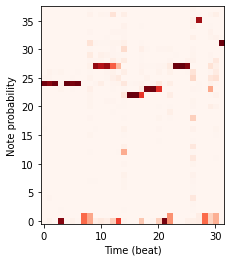

In [23]:
x.generate_music_sequence(visualize_probs=True, title='post_rl', length=32)

<tf.Tensor 'Merge/MergeSummary:0' shape=() dtype=string>